<a href="https://colab.research.google.com/github/claredavies/MachineLearningCoursework/blob/main/Assignment1/MLAssignment1Unbalanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [94]:
# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [95]:
from google.colab import files
uploaded = files.upload()
dataset = pd.read_csv('bank-additional-full.csv', sep=';', delimiter=None, header='infer', names=None, index_col=None)

Saving bank-additional-full.csv to bank-additional-full (9).csv


Unique values of the target variable [0 1]
Counts of the target variable : [36548  4640]
Examples:
    Total: 41188
    Yes: 4640 (11.27% of total)



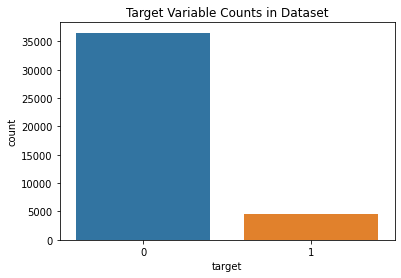

In [96]:
dataset.rename(columns = {'y':'target'}, inplace = True)
dataset['target'] = dataset.target.apply(lambda x: 1 if x == "yes" else 0)

(unique, counts) = np.unique(dataset['target'], return_counts=True)

neg = counts[0]
pos = counts[1]
total = yes + no
print('Unique values of the target variable', unique)
print('Counts of the target variable :', counts)
print('Examples:\n    Total: {}\n    Yes: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

sns.countplot(data = dataset,x = 'target')
plt.title('Target Variable Counts in Dataset')
plt.show()

In [97]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [98]:
dataset['job'] = pd.factorize(dataset['job'])[0] + 1
dataset['marital'] = pd.factorize(dataset['marital'])[0] + 1
dataset['education'] = pd.factorize(dataset['education'])[0] + 1
dataset['default'] = pd.factorize(dataset['default'])[0] + 1
dataset['housing'] = pd.factorize(dataset['housing'])[0] + 1
dataset['default'] = pd.factorize(dataset['default'])[0] + 1
dataset['loan'] = pd.factorize(dataset['loan'])[0] + 1
dataset['contact'] = pd.factorize(dataset['contact'])[0] + 1
dataset['month'] = pd.factorize(dataset['month'])[0] + 1
dataset['day_of_week'] = pd.factorize(dataset['day_of_week'])[0] + 1
dataset['poutcome'] = pd.factorize(dataset['contact'])[0] + 1

# Should remove - duration as only for benchmark
dataset = dataset.drop('duration', 1)

In [99]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  int64  
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [100]:
# Use a utility from sklearn to split and shuffle your dataset.
train_df, test_df = train_test_split(dataset, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('target'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('target'))
test_labels = np.array(test_df.pop('target'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [101]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (26360,)
Validation labels shape: (6590,)
Test labels shape: (8238,)
Training features shape: (26360, 19)
Validation features shape: (6590, 19)
Test features shape: (8238, 19)


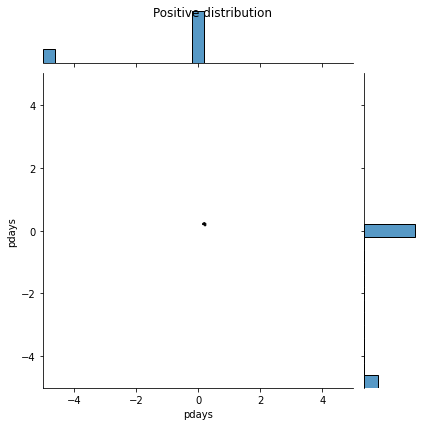

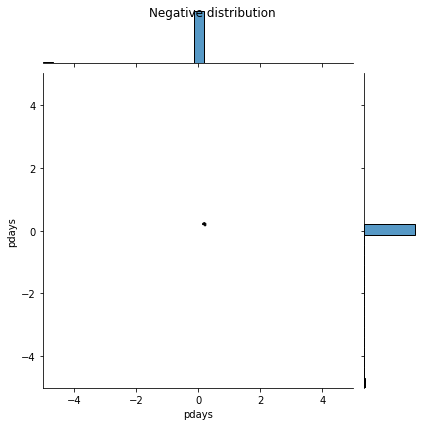

In [102]:
# dataset_part1.hist(figsize = (16,18))
# dataset.groupby('target').hist(figsize = (16,18))
# dataset.groupby('target').pdays.hist(alpha=0.4)

pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)

sns.jointplot(x=pos_df['pdays'], y=pos_df['pdays'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(x=neg_df['pdays'], y=neg_df['pdays'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
_ = plt.suptitle("Negative distribution")

In [103]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [104]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

model = make_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                320       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [105]:
model.predict(train_features[:10])

array([[0.22851822],
       [0.1651771 ],
       [0.45216393],
       [0.16336793],
       [0.05882645],
       [0.18172747],
       [0.1668511 ],
       [0.16877246],
       [0.21216539],
       [0.22349048]], dtype=float32)

In [110]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))
print("pos:  " + str(pos))
print("neg:  " + str(neg))
initial_bias = np.log([pos/neg])
initial_bias

Loss: 0.3759
pos4640
neg36548


array([-2.0639121])

In [111]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.09771356],
       [0.38201424],
       [0.23512655],
       [0.1644128 ],
       [0.27412474],
       [0.40858102],
       [0.01566875],
       [0.1814132 ],
       [0.34522116],
       [0.17947176]], dtype=float32)

In [112]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.5124


In [113]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

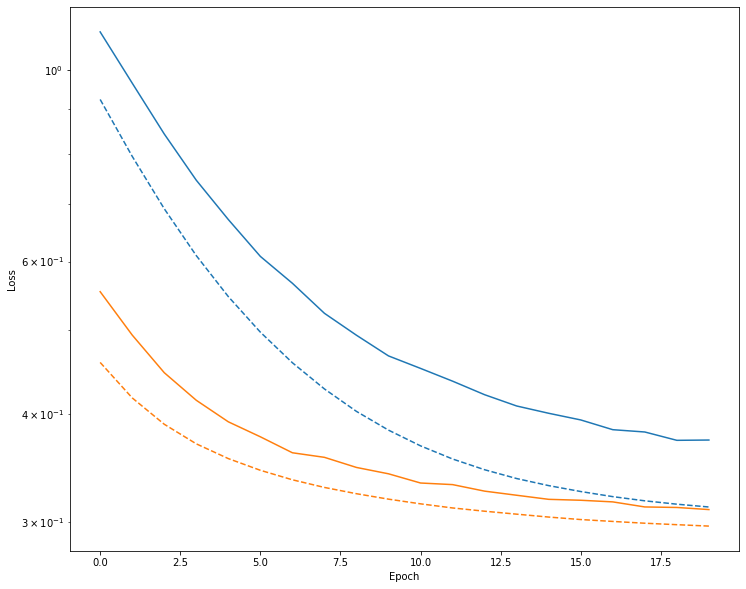

In [116]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [117]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
13/13 [==============================] - 8s 213ms/step - loss: 0.5556 - tp: 205.0000 - fp: 2504.0000 - tn: 26753.0000 - fn: 3488.0000 - accuracy: 0.8181 - precision: 0.0757 - recall: 0.0555 - auc: 0.4559 - prc: 0.0997 - val_loss: 0.4586 - val_tp: 4.0000 - val_fp: 119.0000 - val_tn: 5713.0000 - val_fn: 754.0000 - val_accuracy: 0.8675 - val_precision: 0.0325 - val_recall: 0.0053 - val_auc: 0.3416 - val_prc: 0.0823
Epoch 2/100
13/13 [==============================] - 0s 22ms/step - loss: 0.4911 - tp: 120.0000 - fp: 1533.0000 - tn: 21892.0000 - fn: 2815.0000 - accuracy: 0.8351 - precision: 0.0726 - recall: 0.0409 - auc: 0.4242 - prc: 0.0938 - val_loss: 0.4170 - val_tp: 2.0000 - val_fp: 65.0000 - val_tn: 5767.0000 - val_fn: 756.0000 - val_accuracy: 0.8754 - val_precision: 0.0299 - val_recall: 0.0026 - val_auc: 0.4039 - val_prc: 0.0930
Epoch 3/100
13/13 [==============================] - 0s 14ms/step - loss: 0.4423 - tp: 109.0000 - fp: 901.0000 - tn: 22524.0000 - fn: 2826.0000 - 

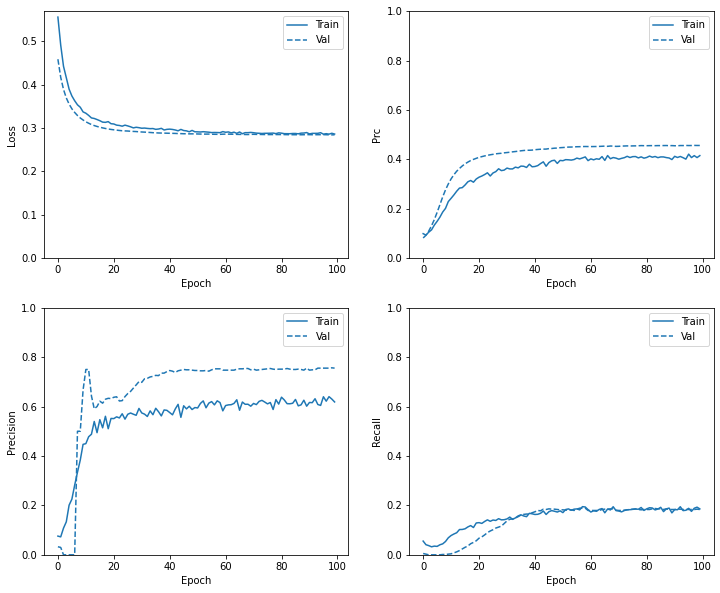

In [119]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend();

plot_metrics(baseline_history)

loss :  0.29261547327041626
tp :  157.0
fp :  79.0
tn :  7212.0
fn :  790.0
accuracy :  0.8945132493972778
precision :  0.6652542352676392
recall :  0.16578669846057892
auc :  0.7748949527740479
prc :  0.42098528146743774

Legitimate Transactions Detected (True Negatives):  7212
Legitimate Transactions Incorrectly Detected (False Positives):  79
Fraudulent Transactions Missed (False Negatives):  790
Fraudulent Transactions Detected (True Positives):  157
Total Fraudulent Transactions:  947


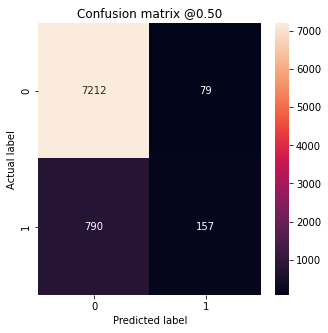

In [122]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

In [124]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.56
Weight for class 1: 4.44


In [125]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight)

Epoch 1/100
13/13 [==============================] - 4s 91ms/step - loss: 1.3859 - tp: 321.0000 - fp: 2953.0000 - tn: 27763.0000 - fn: 3561.0000 - accuracy: 0.8117 - precision: 0.0980 - recall: 0.0827 - auc: 0.4659 - prc: 0.1043 - val_loss: 0.4819 - val_tp: 11.0000 - val_fp: 192.0000 - val_tn: 5640.0000 - val_fn: 747.0000 - val_accuracy: 0.8575 - val_precision: 0.0542 - val_recall: 0.0145 - val_auc: 0.3352 - val_prc: 0.0814
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 1.2503 - tp: 252.0000 - fp: 2820.0000 - tn: 20605.0000 - fn: 2683.0000 - accuracy: 0.7912 - precision: 0.0820 - recall: 0.0859 - auc: 0.4134 - prc: 0.0920 - val_loss: 0.4561 - val_tp: 9.0000 - val_fp: 160.0000 - val_tn: 5672.0000 - val_fn: 749.0000 - val_accuracy: 0.8621 - val_precision: 0.0533 - val_recall: 0.0119 - val_auc: 0.3864 - val_prc: 0.0899
Epoch 3/100
13/13 [==============================] - 0s 9ms/step - loss: 1.1533 - tp: 316.0000 - fp: 2769.0000 - tn: 20656.0000 - fn: 2619.0000 - 

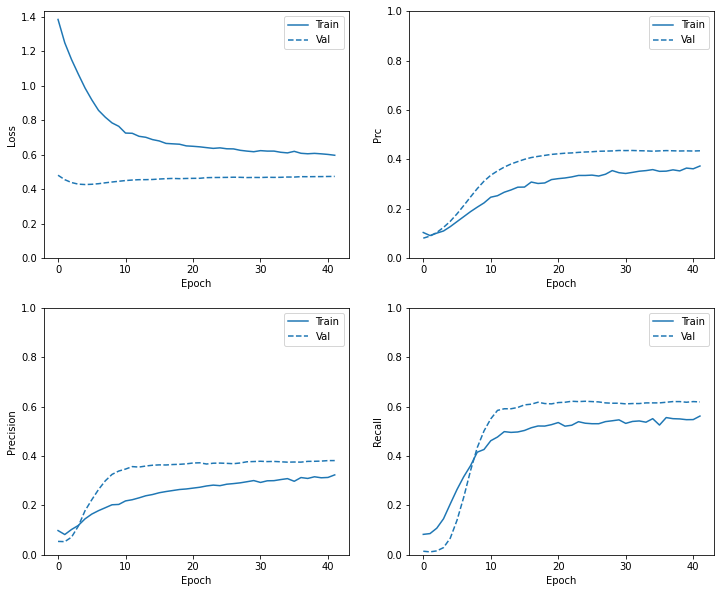

In [126]:
plot_metrics(weighted_history)

loss :  0.48616692423820496
tp :  553.0
fp :  1018.0
tn :  6273.0
fn :  394.0
accuracy :  0.8285991549491882
precision :  0.35200509428977966
recall :  0.5839493274688721
auc :  0.7693631052970886
prc :  0.40525293350219727

Legitimate Transactions Detected (True Negatives):  6273
Legitimate Transactions Incorrectly Detected (False Positives):  1018
Fraudulent Transactions Missed (False Negatives):  394
Fraudulent Transactions Detected (True Positives):  553
Total Fraudulent Transactions:  947


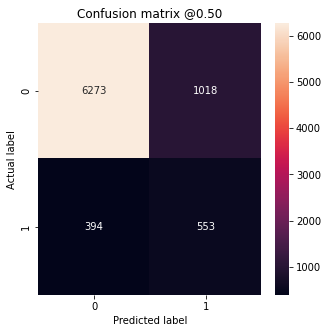

In [127]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

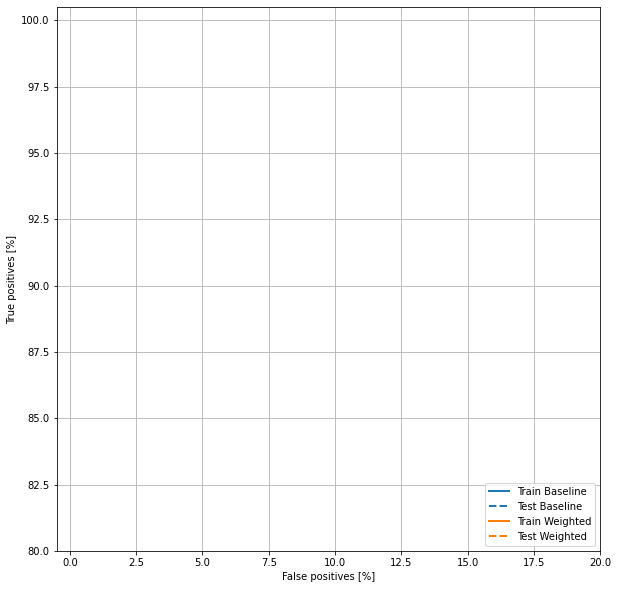

In [128]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right');

In [132]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

BUFFER_SIZE = 100000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

resampled_ds = tf.data.Dataset.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

Features:
 [ 0.19182222  2.5873784  -0.73317814  0.3292805  -0.51489634  0.78825233
 -0.43864911 -1.31762773 -0.50767206  1.42936252  0.8714192   0.19597933
 -0.34968174 -1.31762773  0.83617097  1.53012577 -0.28086557  0.76924251
  0.84342262]

Label:  1


36.0

In [133]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/100
36/36 [==============================] - 5s 91ms/step - loss: 0.9979 - tp: 17985.0000 - fp: 22822.0000 - tn: 21411.0000 - fn: 19748.0000 - accuracy: 0.4806 - precision: 0.4407 - recall: 0.4766 - auc: 0.4692 - prc: 0.4374 - val_loss: 0.7922 - val_tp: 402.0000 - val_fp: 3272.0000 - val_tn: 2560.0000 - val_fn: 356.0000 - val_accuracy: 0.4495 - val_precision: 0.1094 - val_recall: 0.5303 - val_auc: 0.4737 - val_prc: 0.1093
Epoch 2/100
36/36 [==============================] - 2s 62ms/step - loss: 0.7949 - tp: 19399.0000 - fp: 17395.0000 - tn: 19375.0000 - fn: 17559.0000 - accuracy: 0.5259 - precision: 0.5272 - recall: 0.5249 - auc: 0.5417 - prc: 0.5460 - val_loss: 0.6567 - val_tp: 473.0000 - val_fp: 2407.0000 - val_tn: 3425.0000 - val_fn: 285.0000 - val_accuracy: 0.5915 - val_precision: 0.1642 - val_recall: 0.6240 - val_auc: 0.6516 - val_prc: 0.1819
Epoch 3/100
36/36 [==============================] - 2s 67ms/step - loss: 0.7057 - tp: 21060.0000 - fp: 14588.0000 - tn: 22273.0000 

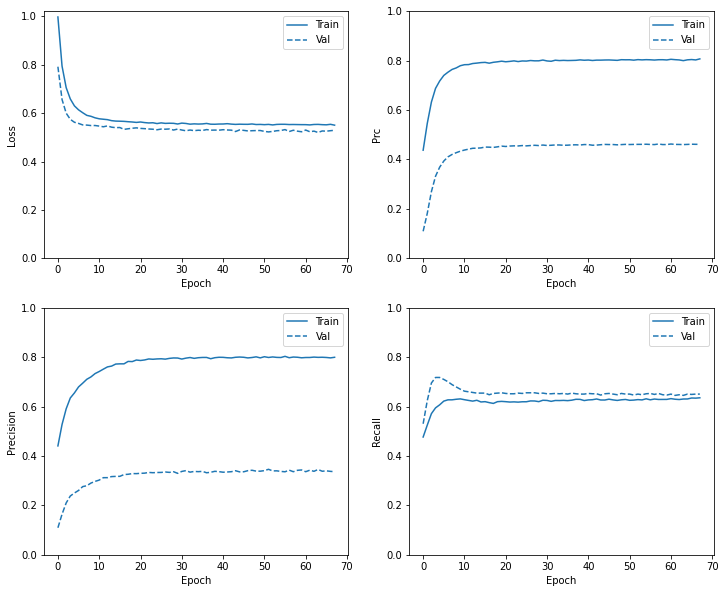

In [134]:
plot_metrics(resampled_history)

In [135]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=10*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))

Epoch 1/1000
20/20 [==============================] - 6s 123ms/step - loss: 1.0520 - tp: 10122.0000 - fp: 13414.0000 - tn: 12796.0000 - fn: 11218.0000 - accuracy: 0.4820 - precision: 0.4301 - recall: 0.4743 - auc: 0.4556 - prc: 0.4208 - val_loss: 0.9012 - val_tp: 380.0000 - val_fp: 3963.0000 - val_tn: 1869.0000 - val_fn: 378.0000 - val_accuracy: 0.3413 - val_precision: 0.0875 - val_recall: 0.5013 - val_auc: 0.3763 - val_prc: 0.0879
Epoch 2/1000
20/20 [==============================] - 1s 65ms/step - loss: 0.9064 - tp: 10042.0000 - fp: 11328.0000 - tn: 9216.0000 - fn: 10374.0000 - accuracy: 0.4702 - precision: 0.4699 - recall: 0.4919 - auc: 0.4604 - prc: 0.4763 - val_loss: 0.7716 - val_tp: 413.0000 - val_fp: 3121.0000 - val_tn: 2711.0000 - val_fn: 345.0000 - val_accuracy: 0.4741 - val_precision: 0.1169 - val_recall: 0.5449 - val_auc: 0.4986 - val_prc: 0.1161
Epoch 3/1000
20/20 [==============================] - 1s 67ms/step - loss: 0.8062 - tp: 10728.0000 - fp: 9842.0000 - tn: 10627.000

loss :  0.5513927340507507
tp :  586.0
fp :  1322.0
tn :  5969.0
fn :  361.0
accuracy :  0.7957028150558472
precision :  0.3071278929710388
recall :  0.618796169757843
auc :  0.7753109335899353
prc :  0.4167260527610779

Legitimate Transactions Detected (True Negatives):  5969
Legitimate Transactions Incorrectly Detected (False Positives):  1322
Fraudulent Transactions Missed (False Negatives):  361
Fraudulent Transactions Detected (True Positives):  586
Total Fraudulent Transactions:  947


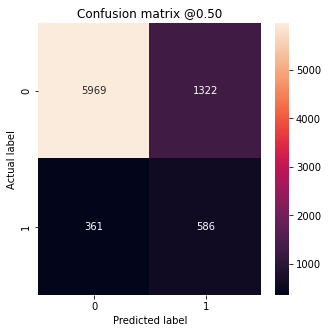

In [136]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)